# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Last Dataset Check/Additions

In [2]:
model = pd.read_csv('../data/combined_total.csv')

In [3]:
model.head()

,title,created_utc,score,subreddit,words
0,TIL that the infectious earworm that is the Sk...,1627824715,1,todayilearned,20
1,TIL: Ian Manuel was 13 when he shot Debbie Bai...,1633789935,1,todayilearned,30
2,TIL Handheld Flamethrowers were invented by th...,1601932476,1,todayilearned,22
3,TIL that a stolen 9.5 million dollar Stradivar...,1607907053,2,todayilearned,17
4,TIL that only 5.5% of participants responded “...,1615603706,1,todayilearned,32


In [4]:
model.isnull().sum()

title          0
created_utc    0
score          0
subreddit      0
words          0
dtype: int64

All looks clean

### Binarizing the Subreddit Column

In [5]:
model.subreddit = model.subreddit.str.replace('todayilearned','1')
model.subreddit = model.subreddit.str.replace('ShittyTodayILearned','0')

model['subreddit'] = model['subreddit'].astype(int)

### Creating Stopwords List

In [6]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(('til', 'todayilearned', 'til:', 'stil', 'shittytodayilearned', 'today', 'learned'))

These words might artificially increase accuracy, which I do not want

# Simple Models

I will run all models and save comments until I see all. I am looking for models that have a higher accuracy than average.

In [7]:
X = model['title']
y = model['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X , y, random_state = 42)

This will be used in all models

## CV Logistic Regression

In [8]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words = stopwords, ngram_range = (1, 2))),
    ('lr', LogisticRegressionCV())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.9869155086722792
Testing Accuracy: 0.7642226954669912


Specificity: 0.8420398009950248
Type I Error: 0.15796019900497515
Precision: 0.8201133144475921
Recall: 0.6896962477665277


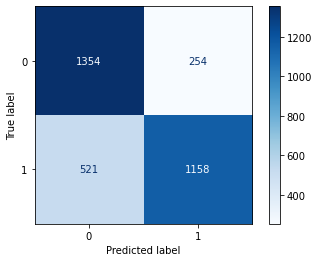

In [9]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')
print(f'Precision: {(tp) / (tp + fp)}')
print(f'Recall: {(tp) / (tp + fn)}')
plt.savefig('../images/cvlr_matrix.png')

## CV Decision Trees

In [10]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words = stopwords, ngram_range = (1, 2))),
    ('dt', DecisionTreeClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.9998985698346688
Testing Accuracy: 0.6689990873136599


Specificity: 0.6579601990049752
Type I Error: 0.34203980099502485


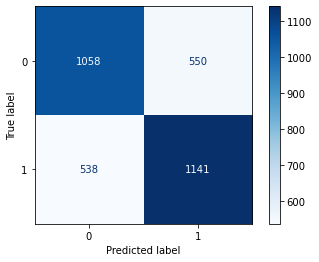

In [11]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## CV Gradient Boost

In [12]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words = stopwords, ngram_range = (1, 2))),
    ('gb', GradientBoostingClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.715792676742063
Testing Accuracy: 0.6683906297535747


Specificity: 0.7985074626865671
Type I Error: 0.20149253731343286


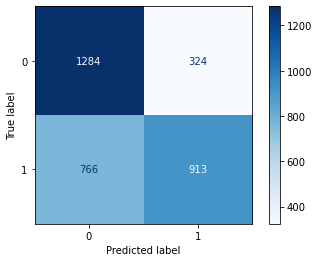

In [13]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## CV ADA Boost

In [14]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words = stopwords, ngram_range = (1, 2))),
    ('abc', AdaBoostClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.6786692362308551
Testing Accuracy: 0.6616975965926377


Specificity: 0.8084577114427861
Type I Error: 0.1915422885572139


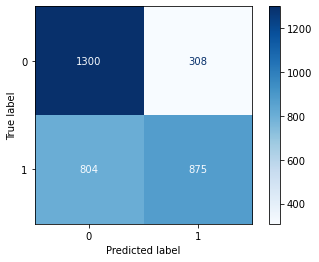

In [15]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## CV Bagging

In [16]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words = stopwords, ngram_range = (1, 2))),
    ('bc', BaggingClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.9745410285018764
Testing Accuracy: 0.6979008214177062


Specificity: 0.7232587064676617
Type I Error: 0.27674129353233834


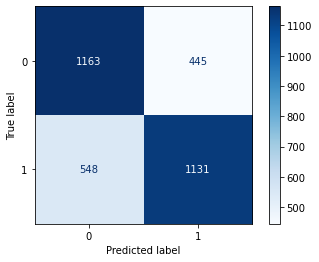

In [17]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## TFID Logistic Regression

In [18]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('lr', LogisticRegressionCV(solver = 'liblinear'))
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.952733542955675
Testing Accuracy: 0.7572254335260116


Specificity: 0.7338308457711443
Type I Error: 0.2661691542288557


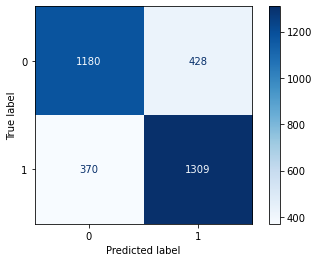

In [19]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## TFID Decision Trees

In [20]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('dt', DecisionTreeClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.9998985698346688
Testing Accuracy: 0.6814724672954061


Specificity: 0.724502487562189
Type I Error: 0.27549751243781095


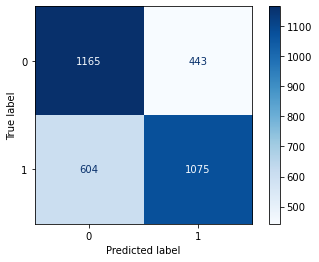

In [21]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## TFID Random Forest

In [22]:
pipe_rf1 = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('rf', RandomForestClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.9998985698346688
Testing Accuracy: 0.6802555521752358


Specificity: 0.7257462686567164
Type I Error: 0.27425373134328357


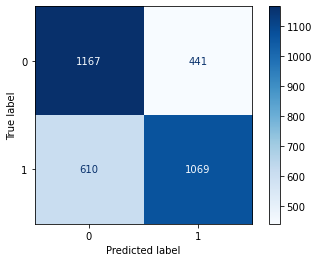

In [23]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## TFID Extra Trees

In [24]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('et', ExtraTreesClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.9998985698346688
Testing Accuracy: 0.7462731974444783


Specificity: 0.8233830845771144
Type I Error: 0.1766169154228856


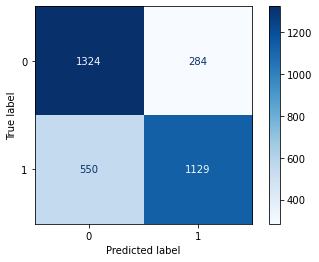

In [25]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## TFID Gradient Boost

In [26]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('gb', GradientBoostingClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.7445988436961152
Testing Accuracy: 0.7009431092181321


Specificity: 0.8519900497512438
Type I Error: 0.14800995024875618


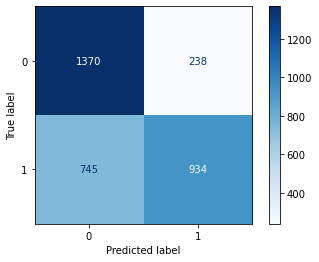

In [27]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## TFID ADA Boost

In [28]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('abc', AdaBoostClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.6728877168069783
Testing Accuracy: 0.6522665044113173


Specificity: 0.8762437810945274
Type I Error: 0.12375621890547261


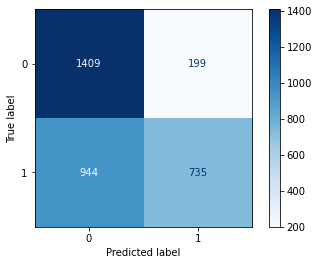

In [29]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## TFID Bagging

In [30]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('bc', BaggingClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.9765696318084999
Testing Accuracy: 0.717371463340432


Specificity: 0.7972636815920398
Type I Error: 0.20273631840796025


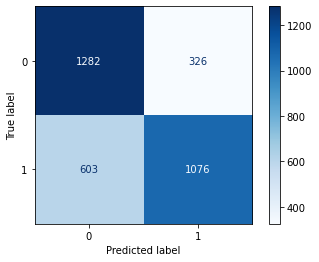

In [31]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

Most classifiers fall into a testing accuracy of 70%. However, 3 models stand above the rest: CV Logistic Regression, TFID Logistic Regression, and TFID Extra Trees.

# GridSearches

I will run all models and save comments until I see all. I am looking for models that have a higher accuracy than average.

In [32]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words = stopwords)),
    ('lr', LogisticRegressionCV(solver = 'liblinear'))
    ])

params = {   
    'cv__max_features': [None, 100, 1000, 5000, 10000, 25000],
    'cv__min_df': [1, 2, 3],
    'lr__Cs': [[.1],[1],[5],[10]],
    'lr__penalty': ['l1', 'l2'],
    'lr__max_iter': [1, 100, 250]
    }

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

pipe_cvlr = GridSearchCV(pipe,
                         params,
                         cv = 5,
                         verbose = 10,
                         n_jobs= -1 )

pipe_cvlr.fit(X_train, y_train)

print(pipe_cvlr.best_params_)
print(f'Training Accuracy: {pipe_cvlr.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe_cvlr.score(X_test, y_test)}')
print(f'Cross Val: {pipe_cvlr.best_score_}')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'cv__max_features': None, 'cv__min_df': 1, 'lr__Cs': [1], 'lr__max_iter': 100, 'lr__penalty': 'l2'}
Training Accuracy: 0.9759610508165129
Testing Accuracy: 0.7617888652266505
Cross Val: 0.7604214971035388


In [33]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('lr', LogisticRegressionCV(solver = 'liblinear'))
    ])

params = {
    'tf__max_features': [None, 100, 1000, 5000, 10000, 25000],
    'tf__min_df': [1, 2, 3],
    'lr__Cs': [[.1],[1],[5],[10]],
    'lr__penalty': ['l1', 'l2'],
    'lr__max_iter': [1, 100, 250]
    }

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

pipe_tflr = GridSearchCV(pipe,
                         params,
                         cv = 5,
                         verbose = 1,
                         n_jobs= -1 )

pipe_tflr.fit(X_train, y_train)

print(pipe_tflr.best_params_)
print(f'Training Accuracy: {pipe_tflr.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe_tflr.score(X_test, y_test)}')
print(f'Cross Val: {pipe_tflr.best_score_}')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'lr__Cs': [1], 'lr__max_iter': 100, 'lr__penalty': 'l2', 'tf__max_features': None, 'tf__min_df': 2}
Training Accuracy: 0.8872096561517395
Testing Accuracy: 0.7490112564648616
Cross Val: 0.7550455746251683


In [34]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('et', ExtraTreesClassifier())
    ])

params = {
    'tf__max_features': [None, 5000, 10000, 25000],
    'tf__min_df': [1, 2, 3],
    'et__max_depth': [None, 1, 2, 3, 4, 5],
    'et__min_samples_split': [2, 10, 25],
    'et__min_samples_leaf': [1, 5, 10]
    }

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

pipe_tfet = GridSearchCV(pipe,
                         params,
                         cv = 5,
                         verbose = 1,
                         n_jobs= -1 )

pipe_tfet.fit(X_train, y_train)

print(pipe_tfet.best_params_)
print(f'Training Accuracy: {pipe_tfet.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe_tfet.score(X_test, y_test)}')
print(f'Cross Val: {pipe_tfet.best_score_}')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
{'et__max_depth': None, 'et__min_samples_leaf': 1, 'et__min_samples_split': 25, 'tf__max_features': 25000, 'tf__min_df': 1}
Training Accuracy: 0.9928998884268181
Testing Accuracy: 0.7557042896257986
Cross Val: 0.7596101895332216


The GridSearches led to slightly better fitting models, but to the detriment of testing accuracy. These models are close, but looking to specificity as a tiebreaker, the best model is:
**CV Logistic Regression**